In [59]:
import numpy as np

def get_mean_stddev(numbers):
  # input: numbers, a list of real numbers
  # output: the mean and standard deviation of numbers
    mean = np.mean(numbers)
    stddev = np.std(numbers)
    return mean, stddev

In [61]:
# A useful function
def read_data(data_file_name):
    with open(data_file_name, 'r') as input_file:
        areas = []
        nbedrooms = []
        prices = []
    # Read the input file line by line
        content = input_file.readlines()
        input_file.close()
        for i in content:
            row = i.strip().split(',')
            areas.append(float(row[0]))
            nbedrooms.append(float(row[1]))
            prices.append(float(row[2]))

    return areas, nbedrooms, prices

In [62]:
def create_normalized_data(data_file_name):
    areas, nbedrooms, prices = read_data(data_file_name)
    areas_mean, areas_stddev = get_mean_stddev(areas)
    nbedrooms_mean, nbedrooms_stddev = get_mean_stddev(nbedrooms)
    with open('normalized.txt', 'w') as output_file:
        for a,n,p in zip(areas, nbedrooms, prices):
            output_file.write(str((a-areas_mean)/areas_stddev) + ',' + 
                            str((n-nbedrooms_mean)/nbedrooms_stddev) + ',' + 
                            str(p) + '\n')
  # Return the mean and std dev for later use (during prediction)
    return areas_mean, areas_stddev, nbedrooms_mean, nbedrooms_stddev


In [63]:
# Test create_normalized_data
data_file_name = 'housing.txt'
areas_mean, areas_stddev, nbedrooms_mean, nbedrooms_stddev = create_normalized_data(data_file_name)

# Computing optimal parameters

In [64]:
def optimal_w(data):
    X = [[1]*len(data[0])]
    y = []
    X.append(data[0])
    X.append(data[1])
    y.append(data[2])
    matr_X = np.matrix(X).T
    matr_y = np.matrix(y).T
    w = (matr_X.T*matr_X).I*matr_X.T*matr_y
    opt_w0 = w[0,0]
    opt_w1 = w[1,0]
    opt_w2 = w[2,0]
    return opt_w0, opt_w1, opt_w2

In [65]:
optimal_w(read_data('normalized.txt'))

(340412.65957446815, 109447.79646964183, -6578.354854161247)

In [66]:
def gradient_descent(alpha, niter, data):
  # alpha: learning rage
  # niter: number of iterations
  # data: data set
  # outputs values of the parameters and the objective
    w0, w1, w2 = 0., 0., 0.
    areas, nbedrooms, prices = data
    N_samples = len(areas)
    for _ in range (niter):
        y_preds = [w0+w1*x1+w2*x2 for x1,x2 in zip(areas, nbedrooms)]
        errors = [p - y_pred for p,y_pred in zip(prices, y_preds)]
        # Compute partial derivatives
        dJ_dw0 = (1/N_samples)*sum([(w0+w1*x1+w2*x2-y) for x1,x2,y in zip(areas, nbedrooms, prices)])
        dJ_dw1 = (1/N_samples)*sum([(w0+w1*x1+w2*x2-y)*x1 for x1,x2,y in zip(areas, nbedrooms, prices)])
        dJ_dw2 = (1/N_samples)*sum([(w0+w1*x1+w2*x2-y)*x2 for x1,x2,y in zip(areas, nbedrooms, prices)])
        # Update weights
        w0 = w0 - alpha*dJ_dw0
        w1 = w1 - alpha*dJ_dw1
        w2 = w2 - alpha*dJ_dw2
  # Do one last evaluation after the last gradient step
    Jw = (1/2/N_samples)*sum([(y-(w0+w1*x1+w2*x2))**2 for x1,x2,y in zip(areas, nbedrooms, prices)])
    return w0, w1, w2, Jw

In [67]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 100

# Try several values of alpha
for alpha in [0.01, 0.1, 0.3]:
    w0,w1,w2,Jw = gradient_descent(alpha, niter, (areas, nbedrooms, prices))
    print("alpha = {}, J(w) = {}, (w0,w1,w2) = {})".format(alpha, Jw, (w0,w1,w2)))

alpha = 0.01, J(w) = 10596969344.16698, (w0,w1,w2) = (215810.61679137868, 61446.18781360759, 20070.133137958164))
alpha = 0.1, J(w) = 2043462824.6181679, (w0,w1,w2) = (340403.6177380308, 108803.37852265747, -5933.9413401980155))
alpha = 0.3, J(w) = 2043280050.6035767, (w0,w1,w2) = (340412.659574468, 109447.75525930755, -6578.313643827))


In [68]:
def gradient_descent(alpha, niter, data):
    w0, w1, w2 = 0., 0., 0.
    areas, nbedrooms, prices = data
    N_samples = len(areas)
    Jws = []
    for k in range (niter):
        Jw = (1/2/N_samples)*sum([(y-(w0+w1*x1+w2*x2))**2 for x1,x2,y in zip(areas, nbedrooms, prices)])
        Jws.append(Jw) 
        if k%10==0:
            print("k={}, J(w)={}".format(k, Jw))
    # Compute partial derivatives
        dJ_dw0 = (1/N_samples)*sum([(w0+w1*x1+w2*x2-y) for x1,x2,y in zip(areas, nbedrooms, prices)])
        dJ_dw1 = (1/N_samples)*sum([(w0+w1*x1+w2*x2-y)*x1 for x1,x2,y in zip(areas, nbedrooms, prices)])
        dJ_dw2 = (1/N_samples)*sum([(w0+w1*x1+w2*x2-y)*x2 for x1,x2,y in zip(areas, nbedrooms, prices)])
        # Update weights
        w0 = w0 - alpha*dJ_dw0
        w1 = w1 - alpha*dJ_dw1
        w2 = w2 - alpha*dJ_dw2
  # Do one last evaluation after the last gradient step
    Jw = (1/2/N_samples)*sum([(y-(w0+w1*x1+w2*x2))**2 for x1,x2,y in zip(areas, nbedrooms, prices)])
    Jws.append(Jw)
    return w0, w1, w2, Jws

k=0, J(w)=65591548106.45744
k=10, J(w)=53802483965.89505
k=20, J(w)=44245589521.92842
k=30, J(w)=36489079464.915146
k=40, J(w)=30186817066.68309
k=50, J(w)=25060807019.77559
k=60, J(w)=20887393221.120003
k=70, J(w)=17486347244.69389
k=80, J(w)=14712219196.319695
k=90, J(w)=12447464565.477884
k=0, J(w)=65591548106.45744
k=10, J(w)=9828412382.488956
k=20, J(w)=3149150567.499295
k=30, J(w)=2247079093.6803536
k=40, J(w)=2096405990.7371306
k=50, J(w)=2061269629.246131
k=60, J(w)=2050155296.7053475
k=70, J(w)=2046021948.260498
k=80, J(w)=2044388322.4515285
k=90, J(w)=2043729844.9843404
k=0, J(w)=65591548106.45744
k=10, J(w)=2176789165.5439835
k=20, J(w)=2048458902.9165497
k=30, J(w)=2043583067.7216742
k=40, J(w)=2043297904.0299792
k=50, J(w)=2043281102.6060786
k=60, J(w)=2043280112.5916128
k=70, J(w)=2043280054.255487
k=80, J(w)=2043280050.8180594
k=90, J(w)=2043280050.6155102


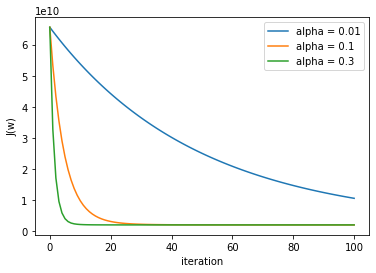

In [69]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 100

# Try several values of alpha
for alpha in (0.01, 0.1, 0.3):
    _,_,_, Jws = gradient_descent(alpha, niter, (areas, nbedrooms, prices))
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

k=0, J(w)=65591548106.45744
k=10, J(w)=64303836897.56083
k=20, J(w)=63042880008.80655
k=30, J(w)=61808106035.02421
k=40, J(w)=60598956190.66407
k=50, J(w)=59414884019.59988
k=60, J(w)=58255355111.918106
k=70, J(w)=57119846827.51752
k=80, J(w)=56007848026.347176
k=90, J(w)=54918858805.11561
k=0, J(w)=65591548106.45744
k=10, J(w)=7.99600418545759e+32
k=20, J(w)=1.5465083680004704e+56
k=30, J(w)=2.9937412020863625e+79
k=40, J(w)=5.795304485103295e+102
k=50, J(w)=1.121858965356428e+126
k=60, J(w)=2.1717021795588425e+149
k=70, J(w)=4.203995780523273e+172
k=80, J(w)=8.138123490877392e+195
k=90, J(w)=1.5753834544650036e+219


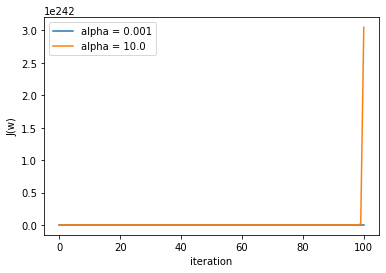

In [70]:
# Try several values of alpha
for alpha in [0.001, 10.0]:
    _,_,_, Jws = gradient_descent(alpha, niter, (areas, nbedrooms, prices))
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

For stochastic gradient descent, we consider the loss associated to a given sample point $(x,y)$:
$$
  J(w|x) = J(w_0,w_1,w_2|x) = \frac{1}{2}\left(y - w_0 - w_1 x_1 - w_2 x_2\right)^2
$$

In [71]:
import random

# For the sake of reproducibility we fix 
# the seed of the randomness
random.seed(42) 

def sto_gradient_descent(alpha, niter, data):
    w0, w1, w2 = 0., 0., 0.
    areas, nbedrooms, prices = data
    N_samples = len(areas)
    Jws_sample = []
    Jws = []
    for k in range (niter):
    # Pick randomly a sample's index
        i = random.randint(0,N_samples-1)
        Jw_sample = (1/2)*(prices[i]-(w0+w1*areas[i]+w2*nbedrooms[i]))**2
        Jws_sample.append(Jw_sample) 
        # Evaluate true J(w)
        Jw = (1/2/N_samples)*sum([(y-(w0+w1*x1+w2*x2))**2 for x1,x2,y in zip(areas, nbedrooms, prices)])
        # value of J on the whole data set
        Jws.append(Jw)
        if k%10==0:
            print("k={}, J(w|x)={}, J(w)={}".format(k, Jw_sample, Jw))
        # Compute partial derivatives
        dJ_dw0 = (w0+w1*areas[i]+w2*nbedrooms[i]-prices[i])
        dJ_dw1 = (w0+w1*areas[i]+w2*nbedrooms[i]-prices[i])*areas[i]
        dJ_dw2 = (w0+w1*areas[i]+w2*nbedrooms[i]-prices[i])*nbedrooms[i]
        # Update weights
        w0 = w0 - alpha*dJ_dw0
        w1 = w1 - alpha*dJ_dw1
        w2 = w2 - alpha*dJ_dw2
  # Do one last evaluation after the last gradient step
    i = random.randint(0,N_samples)
    Jw_sample = (1/2)*(prices[i]-(w0+w1*areas[i]+w2*nbedrooms[i]))**2
    Jws_sample.append(Jw_sample)
  # Evaluate true J(w) 
    Jw = (1/2/N_samples)*sum([(y-(w0+w1*x1+w2*x2))**2 for x1,x2,y in zip(areas, nbedrooms, prices)])
    Jws.append(Jw)
    return w0, w1, w2, Jws, Jws_sample

k=0, J(w|x)=67896125000.0, J(w)=65591548106.45744
k=10, J(w|x)=37495648019.78809, J(w)=58189522547.40769
k=20, J(w|x)=40612581644.87734, J(w)=43427906701.25152
k=30, J(w|x)=25704898498.17787, J(w)=37347948410.97849
k=40, J(w|x)=20110267670.468613, J(w)=30806886625.70406
k=50, J(w|x)=11477459293.731686, J(w)=25156094824.212208
k=60, J(w|x)=3051197055.221406, J(w)=21224644023.13865
k=70, J(w|x)=10845166554.862038, J(w)=18245143868.137463
k=80, J(w|x)=37210509538.90154, J(w)=15938810829.264795
k=90, J(w|x)=2069726878.5910416, J(w)=13388052468.667316
k=100, J(w|x)=7102938830.875416, J(w)=11618052000.98185
k=110, J(w|x)=22511103515.060814, J(w)=10238920163.63606
k=120, J(w|x)=2155048820.6814833, J(w)=8907497111.023687
k=130, J(w|x)=4428484534.818997, J(w)=7798805400.277448
k=140, J(w|x)=18930728614.80897, J(w)=7364865227.04247
k=150, J(w|x)=24144084957.792206, J(w)=6081268655.7198305
k=160, J(w|x)=1134179086.3996568, J(w)=5354111990.139565
k=170, J(w|x)=8609865795.102783, J(w)=4933999495.28

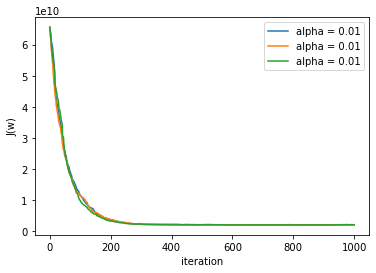

In [72]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 1000

# Try several runs with the same alpha
for alpha in (0.01, 0.01, 0.01):
    _,_,_, Jws, _ = sto_gradient_descent(alpha, niter, (areas, nbedrooms, prices))
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

k=0, J(w|x)=54449670000.5, J(w)=65591548106.45744
k=10, J(w|x)=6537516232.579954, J(w)=11330545560.421787
k=20, J(w|x)=10526167731.506477, J(w)=5701300283.195381
k=30, J(w|x)=2238690286.506011, J(w)=2693690391.9949265
k=40, J(w|x)=8760288552.127167, J(w)=3344825615.9341893
k=50, J(w|x)=3002793698.669495, J(w)=2502758190.938192
k=60, J(w|x)=34255126.51698662, J(w)=2078913515.4370399
k=70, J(w|x)=291044678.63264024, J(w)=2228143144.0834546
k=80, J(w|x)=947799801.3225217, J(w)=2402224301.7032847
k=90, J(w|x)=349811988.41857326, J(w)=2716982347.604341
k=0, J(w|x)=107880125000.0, J(w)=65591548106.45744
k=10, J(w|x)=449612968.26136035, J(w)=17742119129.362953
k=20, J(w|x)=5683210736.820321, J(w)=4276695615.140086
k=30, J(w|x)=19179482.37471463, J(w)=2177318716.130809
k=40, J(w|x)=1812677105.306803, J(w)=2258048003.921701
k=50, J(w|x)=527157283.1646191, J(w)=2290407951.8182964
k=60, J(w|x)=1813876612.6452782, J(w)=2478575404.9162984
k=70, J(w|x)=1208328039.4442897, J(w)=2126199704.4355586
k=8

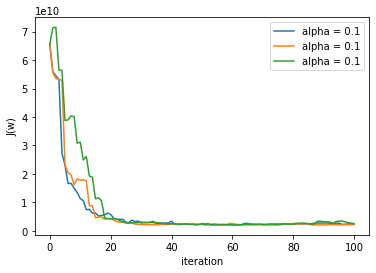

In [73]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 100

# Try several runs with the same alpha
for alpha in (0.1, 0.1, 0.1):
    _,_,_, Jws, _ = sto_gradient_descent(alpha, niter, (areas, nbedrooms, prices))
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

k=0, J(w|x)=28799760000.5, J(w)=65591548106.45744
k=10, J(w|x)=1313086529995.4597, J(w)=786648648383.6246
k=20, J(w|x)=81290424.49449745, J(w)=43321948523.47038
k=30, J(w|x)=48306681627.55781, J(w)=186942430929.7107
k=40, J(w|x)=20493090774.42759, J(w)=16598257202.244202
k=50, J(w|x)=5907322887.06513, J(w)=64310305493.47597
k=60, J(w|x)=240044758117.22906, J(w)=23928451903.286995
k=70, J(w|x)=19535013080.76913, J(w)=68821120376.03593
k=80, J(w|x)=437305768766.99493, J(w)=172665946271.52576
k=90, J(w|x)=8447793670.802002, J(w)=22965738207.630398
k=0, J(w|x)=49581005000.0, J(w)=65591548106.45744
k=10, J(w|x)=257986674882.0354, J(w)=520809462580.2147
k=20, J(w|x)=76097276445.0058, J(w)=54303120188.67653
k=30, J(w|x)=16601867.437850708, J(w)=2818612905.8153543
k=40, J(w|x)=2704381743.86294, J(w)=5289592185.988898
k=50, J(w|x)=2252347321.108691, J(w)=2547930337.545862
k=60, J(w|x)=809949361.625893, J(w)=23439687502.651306
k=70, J(w|x)=2176559209.0816054, J(w)=16795899234.014856
k=80, J(w|x)

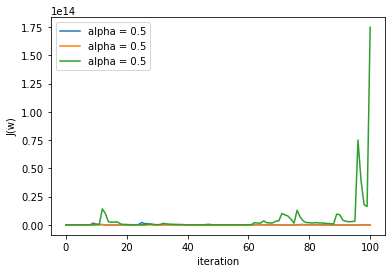

In [74]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 100

# Try several runs with the same alpha
for alpha in (0.5, 0.5, 0.5):
    _,_,_, Jws, _ = sto_gradient_descent(alpha, niter, (areas, nbedrooms, prices))
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

# Prediction

In [75]:
#Direct Inputs:
print('Direct Inputs:')
x1,x2 = 1650,3
matr_x = np.matrix([[1,x1,x2]])
#exact formula:
w_ef = optimal_w(read_data('normalized.txt'))
print('exact formula prediction: ',w_ef[0] + w_ef[1]*x1 + w_ef[2]*x2)
#gradient descent:
areas, nbedrooms, prices = read_data('normalized.txt')
w_gd = gradient_descent(0.3, 100, (areas, nbedrooms, prices))
print('gradient descent prediction: ',w_gd[0] + w_gd[1]*x1 + w_gd[2]*x2)
#stochastic gradient descent:
w_sgd = sto_gradient_descent(0.01, 1000, (areas, nbedrooms, prices))
print('stochastic gradient descent prediction: ',w_sgd[0] + w_sgd[1]*x1 + w_sgd[2]*x2)

#Normalized Inputs:
print('Direct Inputs:')
x1,x2 = (1650-areas_mean)/areas_stddev,(3-nbedrooms_mean)/nbedrooms_stddev
matr_x = np.matrix([[1,x1,x2]])
#exact formula:
w_ef = optimal_w(read_data('normalized.txt'))
print('exact formula prediction: ',w_ef[0] + w_ef[1]*x1 + w_ef[2]*x2)
#gradient descent:
areas, nbedrooms, prices = read_data('normalized.txt')
w_gd = gradient_descent(0.3, 100, (areas, nbedrooms, prices))
print('gradient descent prediction: ',w_gd[0] + w_gd[1]*x1 + w_gd[2]*x2)
#stochastic gradient descent:
w_sgd = sto_gradient_descent(0.01, 1000, (areas, nbedrooms, prices))
print('stochastic gradient descent prediction: ',w_sgd[0] + w_sgd[1]*x1 + w_sgd[2]*x2)

Direct Inputs:
exact formula prediction:  180909541.76992103
k=0, J(w)=65591548106.45744
k=10, J(w)=2176789165.5439835
k=20, J(w)=2048458902.9165497
k=30, J(w)=2043583067.7216742
k=40, J(w)=2043297904.0299792
k=50, J(w)=2043281102.6060786
k=60, J(w)=2043280112.5916128
k=70, J(w)=2043280054.255487
k=80, J(w)=2043280050.8180594
k=90, J(w)=2043280050.6155102
gradient descent prediction:  180909473.89650047
k=0, J(w|x)=44970005000.0, J(w)=65591548106.45744
k=10, J(w|x)=18908572114.667694, J(w)=55070042259.60788
k=20, J(w|x)=24585155562.941772, J(w)=50315740768.713905
k=30, J(w|x)=32136167076.773315, J(w)=39406204299.89373
k=40, J(w|x)=44361663225.789925, J(w)=31955064354.845036
k=50, J(w|x)=5213185156.798005, J(w)=26262065543.190422
k=60, J(w|x)=3483570780.1889114, J(w)=22163462377.688934
k=70, J(w|x)=19455074054.96702, J(w)=19967415407.916
k=80, J(w|x)=5403805976.70469, J(w)=17244568601.285816
k=90, J(w|x)=1238873564.3133786, J(w)=15192052615.8954
k=100, J(w|x)=602266787.7511834, J(w)=122

# Polynomial regression

We now consider a regression with polynomials of degree $2$, and the cost function: 
$$
  J(w) = J(w_0,w_1,w_2) = \frac{1}{2N}\sum_{i=1}^N\left(y^{(i)} - w_0 - w_1 x^{(i)}_1 - w_2 x^{(i)}_2  - w_3 x^{(i)}_1 x^{(i)}_1 - w_4 x^{(i)}_1 x^{(i)}_2 - w_5 x^{(i)}_2 x^{(i)}_2\right)^2
$$

In [76]:
import random

# For the sake of reproducibility we fix 
# the seed of the randomness
random.seed(42) 

def sto_gradient_descent_poly(alpha, niter, data):
    w0, w1, w2, w3, w4, w5 = 0., 0., 0., 0., 0., 0.
    areas, nbedrooms, prices = data
    N_samples = len(areas)
    Jws_sample = []
    Jws = []
    for k in range (niter):
        # Pick randomly a sample's index
        i = random.randint(0,N_samples-1)
        Jw_sample = (1/2)*(prices[i]-(w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2))**2
        Jws_sample.append(Jw_sample) 
        # Evaluate true J(w)
        Jw = (1/2/N_samples)*sum([(y-(w0+w1*x1+w2*x2+w3*x1*x1+w4*x1*x2+w5*x2*x2))**2 for x1,x2,y in zip(areas, nbedrooms, prices)])
        # value of J on the whole data set
        Jws.append(Jw)
        if k%10==0:
            print("k={}, J(w|x)={}, J(w)={}".format(k, Jw_sample, Jw))
        # Compute partial derivatives
        dJ_dw0 = w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2-prices[i]
        dJ_dw1 = (w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2-prices[i])*areas[i]
        dJ_dw2 = (w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2-prices[i])*nbedrooms[i]
        dJ_dw3 = (w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2-prices[i])*areas[i]**2 
        dJ_dw4 = (w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2-prices[i])*areas[i]*nbedrooms[i] 
        dJ_dw5 = (w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2-prices[i])*nbedrooms[i]**2 
        w0 = w0 - alpha*dJ_dw0
        w1 = w1 - alpha*dJ_dw1
        w2 = w2 - alpha*dJ_dw2
        w3 = w3 - alpha*dJ_dw3
        w4 = w4 - alpha*dJ_dw4
        w5 = w5 - alpha*dJ_dw5
    # Do one last evaluation after the last gradient step
    i = random.randint(0,N_samples)
    Jw_sample = (1/2)*(prices[i]-(w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2))**2
    Jws_sample.append(Jw_sample)
    # Evaluate true J(w) 
    Jw = (1/2/N_samples)*sum([(y-(w0+w1*x1+w2*x2+w3*x1*x1+w4*x1*x2+w5*x2*x2))**2 for x1,x2,y in zip(areas, nbedrooms, prices)])
    Jws.append(Jw)
    return w0, w1, w2, w3, w4, w5, Jws, Jws_sample

k=0, J(w|x)=67896125000.0, J(w)=65591548106.45744
k=10, J(w|x)=31999124146.803787, J(w)=47220145248.58572
k=20, J(w|x)=34534060335.07038, J(w)=29422967581.102997
k=30, J(w|x)=18396533264.51412, J(w)=25702163750.707188
k=40, J(w|x)=6363183810.023512, J(w)=32406485546.27664
k=50, J(w|x)=3509772961.9713464, J(w)=20293787274.47399
k=60, J(w|x)=2727155117.9756036, J(w)=18844144874.30364
k=70, J(w|x)=2740797662.0881896, J(w)=20152207899.401196
k=80, J(w|x)=237568762141.6735, J(w)=20926364301.488796
k=90, J(w|x)=2885441064.851159, J(w)=14416452086.102274
k=100, J(w|x)=2471918423.31501, J(w)=12883550145.23699
k=110, J(w|x)=27180090043.06948, J(w)=12218169341.569057
k=120, J(w|x)=2617561044.2652545, J(w)=12117520638.930635
k=130, J(w|x)=141036804.78287536, J(w)=9908973011.678745
k=140, J(w|x)=21193671250.20937, J(w)=10122741160.873692
k=150, J(w|x)=34958696538.13873, J(w)=9538083968.374323
k=160, J(w|x)=8574374043.826609, J(w)=8430767198.269475
k=170, J(w|x)=2420606932.864137, J(w)=7807302799.3

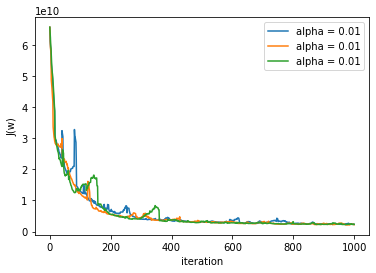

In [77]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 1000

# Try several runs with the same alpha
for alpha in (0.01, 0.01, 0.01):
    _,_,_,_,_,_, Jws, _ = sto_gradient_descent_poly(alpha, niter, (areas, nbedrooms, prices))
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

k=0, J(w|x)=54449670000.5, J(w)=65591548106.45744
k=10, J(w|x)=42948912772.29277, J(w)=34482287358.25327
k=20, J(w|x)=135238456323.16783, J(w)=30068119772.237568
k=30, J(w|x)=63649583154.35453, J(w)=27738082097.204453
k=40, J(w|x)=3286518077.474007, J(w)=22926730497.59401
k=50, J(w|x)=12466361530.410614, J(w)=27048780563.175163
k=60, J(w|x)=24772728390.031746, J(w)=20920888975.271065
k=70, J(w|x)=1557071993.7249749, J(w)=15833763392.463274
k=80, J(w|x)=17394880615.740738, J(w)=15892038378.907875
k=90, J(w|x)=565800299.3878976, J(w)=14391961016.197168
k=0, J(w|x)=107880125000.0, J(w)=65591548106.45744
k=10, J(w|x)=28068173386.61676, J(w)=33292499669.288868
k=20, J(w|x)=42173734424.69687, J(w)=33374620676.05618
k=30, J(w|x)=15518718683.041048, J(w)=26274970404.000126
k=40, J(w|x)=60326271389.82991, J(w)=22720686127.19832
k=50, J(w|x)=7635200910.084833, J(w)=23213344419.232086
k=60, J(w|x)=4992380429.28391, J(w)=24130942321.51399
k=70, J(w|x)=1553783.3757977195, J(w)=22407361257.53173
k=8

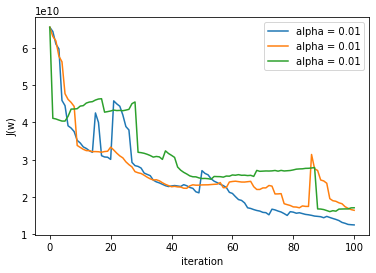

In [78]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 100

# Try several runs with the same alpha
for alpha in (0.01, 0.01, 0.01):
    _,_,_,_,_,_, Jws, _ = sto_gradient_descent_poly(alpha, niter, (areas, nbedrooms, prices))
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

k=0, J(w|x)=28799760000.5, J(w)=65591548106.45744
k=10, J(w|x)=33805717753889.137, J(w)=105262906248464.36
k=20, J(w|x)=1.5685639073326208e+16, J(w)=9.754675445818986e+16
k=30, J(w|x)=4.4112817444738795e+21, J(w)=1.7489526854320566e+22
k=40, J(w|x)=1.4125838242177542e+23, J(w)=1.0921270444110469e+25
k=50, J(w|x)=5.176751638797965e+30, J(w)=1.339518871056045e+32
k=60, J(w|x)=8.502188641595619e+36, J(w)=7.15799125063378e+36
k=70, J(w|x)=1.607301519986381e+36, J(w)=3.0562545511723012e+38
k=80, J(w|x)=5.940671297354267e+40, J(w)=3.3198562024041097e+41
k=90, J(w|x)=4.7752195321025595e+45, J(w)=4.794969843926072e+46
k=0, J(w|x)=49581005000.0, J(w)=65591548106.45744
k=10, J(w|x)=39406940183.91903, J(w)=459514450271849.4
k=20, J(w|x)=15316369039640.447, J(w)=277691519327352.12
k=30, J(w|x)=3929385228044514.5, J(w)=1550726106969101.0
k=40, J(w|x)=1.6860858811050052e+16, J(w)=4.050081750559346e+17
k=50, J(w|x)=3.7363696941354373e+18, J(w)=6.289038706595518e+18
k=60, J(w|x)=9.974802659856582e+19,

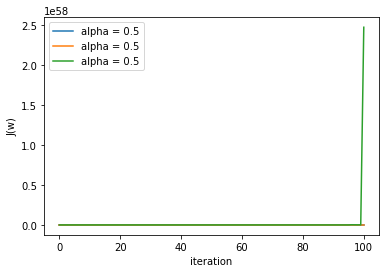

In [79]:
# Test gradient_descent
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 100

# Try several runs with the same alpha
for alpha in (0.5, 0.5, 0.5):
    _,_,_,_,_,_, Jws, _ = sto_gradient_descent_poly(alpha, niter, (areas, nbedrooms, prices))
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

# Ridge regression

In [80]:
import random

# For the sake of reproducibility we fix 
# the seed of the randomness
random.seed(42) 

def sto_gradient_descent_ridge(alpha, niter, data,gamma):
    w0, w1, w2 = 0., 0., 0.
    areas, nbedrooms, prices = data
    N_samples = len(areas)
    Jws_sample = []
    Jws = []
    for k in range (niter):
    # Pick randomly a sample's index
        i = random.randint(0,N_samples-1)
        Jw_sample = (1/2)*(prices[i]-(w0+w1*areas[i]+w2*nbedrooms[i]))**2+gamma*(w0**2+w1**2+w2**2)
        Jws_sample.append(Jw_sample) 
        # Evaluate true J(w)
        Jw = (1/2/N_samples)*sum([(y-(w0+w1*x1+w2*x2))**2+gamma*(w0**2+w1**2+w2**2) for x1,x2,y in zip(areas, nbedrooms, prices)])
        # value of J on the whole data set
        Jws.append(Jw)
        if k%10==0:
            print("k={}, J(w|x)={}, J(w)={}".format(k, Jw_sample, Jw))
        # Compute partial derivatives
        dJ_dw0 = (w0+w1*areas[i]+w2*nbedrooms[i]-prices[i])+2*gamma*w0
        dJ_dw1 = (w0+w1*areas[i]+w2*nbedrooms[i]-prices[i])*areas[i]+2*gamma*w1
        dJ_dw2 = (w0+w1*areas[i]+w2*nbedrooms[i]-prices[i])*nbedrooms[i]+2*gamma*w2
        # Update weights
        w0 = w0 - alpha*dJ_dw0
        w1 = w1 - alpha*dJ_dw1
        w2 = w2 - alpha*dJ_dw2
    # Do one last evaluation after the last gradient step
    i = random.randint(0,N_samples)
    Jw_sample = (1/2)*(prices[i]-(w0+w1*areas[i]+w2*nbedrooms[i]))**2+gamma*(w0**2+w1**2+w2**2)
    Jws_sample.append(Jw_sample)
    # Evaluate true J(w) 
    Jw = (1/2/N_samples)*sum([(y-(w0+w1*x1+w2*x2))**2+gamma*(w0**2+w1**2+w2**2) for x1,x2,y in zip(areas, nbedrooms, prices)])
    Jws.append(Jw)
    return w0, w1, w2, Jws, Jws_sample

k=0, J(w|x)=67896125000.0, J(w)=65591548106.45744
k=10, J(w|x)=37509381489.212776, J(w)=58200143104.68644
k=20, J(w|x)=40697009152.69968, J(w)=43482063867.01158
k=30, J(w|x)=25860171727.75974, J(w)=37453363206.01341
k=40, J(w|x)=20300617974.15588, J(w)=30970689150.186478
k=50, J(w|x)=11753107739.851826, J(w)=25382390581.393192
k=60, J(w|x)=3386969564.454314, J(w)=21509848227.50653
k=70, J(w|x)=11278980607.818707, J(w)=18583670558.214176
k=80, J(w|x)=38305328400.60589, J(w)=16326919057.333858
k=90, J(w|x)=2605926559.7043643, J(w)=13818480164.186777
k=100, J(w|x)=7738281035.187789, J(w)=12089438413.8952
k=110, J(w|x)=23967190166.822235, J(w)=10749927161.148296
k=120, J(w|x)=2858538453.17399, J(w)=9442798013.566563
k=130, J(w|x)=5212116057.272852, J(w)=8363197132.825146
k=140, J(w|x)=19936625376.928196, J(w)=7962510540.508209
k=150, J(w|x)=25590309753.81183, J(w)=6679831072.106599
k=160, J(w|x)=2038902264.110428, J(w)=5973562459.45287
k=170, J(w|x)=9659588857.847082, J(w)=5567859910.56590

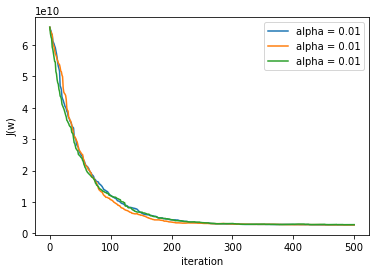

In [81]:
# Test gradient_descent_ridge
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 500

# Try several runs with the same alpha
for alpha in (0.01, 0.01, 0.01):
    _,_,_, Jws, _ = sto_gradient_descent_ridge(alpha, niter, (areas, nbedrooms, prices),0.01)
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

k=0, J(w|x)=22472000000.0, J(w)=65591548106.45744
k=10, J(w|x)=15734115280.251797, J(w)=56887912179.96131
k=20, J(w|x)=33142699774.766853, J(w)=46153659472.09429
k=30, J(w|x)=20542955396.442337, J(w)=37268803961.4065
k=40, J(w|x)=20056866130.65793, J(w)=33747818902.218796
k=50, J(w|x)=10981958143.109903, J(w)=27392346052.270145
k=60, J(w|x)=8726861856.033215, J(w)=22323032209.32897
k=70, J(w|x)=12179233594.905725, J(w)=20005184766.378063
k=80, J(w|x)=10917280427.062187, J(w)=17177563717.99637
k=90, J(w|x)=22326864874.45571, J(w)=16183006323.983255
k=100, J(w|x)=9043744283.855808, J(w)=14985587844.317842
k=110, J(w|x)=31523487784.03434, J(w)=14522238530.114845
k=120, J(w|x)=37031380098.17911, J(w)=13094355719.821995
k=130, J(w|x)=6216257925.313292, J(w)=12512691422.226593
k=140, J(w|x)=14883089902.18703, J(w)=12248006193.527569
k=150, J(w|x)=7939245000.221497, J(w)=11664737748.968195
k=160, J(w|x)=24281055348.041336, J(w)=11353663964.759981
k=170, J(w|x)=6517116574.983867, J(w)=10459931

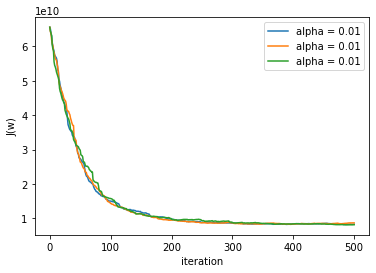

In [82]:
# Test gradient_descent_ridge
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 500

# Try several runs with the same alpha
for alpha in (0.01, 0.01, 0.01):
    _,_,_, Jws, _ = sto_gradient_descent_ridge(alpha, niter, (areas, nbedrooms, prices),0.1)
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

k=0, J(w|x)=164680605000.0, J(w)=65591548106.45744
k=10, J(w|x)=33625389271.844025, J(w)=52319976318.40691
k=20, J(w|x)=74731027505.26553, J(w)=47148117890.06166
k=30, J(w|x)=66545215742.817116, J(w)=44044728284.04636
k=40, J(w|x)=50835038547.19346, J(w)=42181628529.72417
k=50, J(w|x)=44671936709.73419, J(w)=40004287834.08799
k=60, J(w|x)=90307807763.83263, J(w)=39342761293.6683
k=70, J(w|x)=26959127872.684853, J(w)=38566519562.69272
k=80, J(w|x)=21081994392.335915, J(w)=39985153854.65711
k=90, J(w|x)=35901692992.11537, J(w)=41087001272.78887
k=100, J(w|x)=47351343693.4167, J(w)=39682910260.32101
k=110, J(w|x)=27823904247.47717, J(w)=37844043579.60432
k=120, J(w|x)=28304339383.97382, J(w)=38471631757.855225
k=130, J(w|x)=39734668494.0891, J(w)=38119602021.25481
k=140, J(w|x)=66805587297.29385, J(w)=38303642588.27438
k=150, J(w|x)=25289699559.477768, J(w)=38500008682.49104
k=160, J(w|x)=36128763932.46585, J(w)=38503642903.502884
k=170, J(w|x)=53458084740.92033, J(w)=37957577015.40365
k=

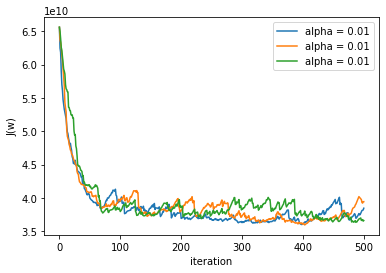

In [83]:
# Test gradient_descent_ridge
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 500

# Try several runs with the same alpha
for alpha in (0.01, 0.01, 0.01):
    _,_,_, Jws, _ = sto_gradient_descent_ridge(alpha, niter, (areas, nbedrooms, prices),1.0)
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

In [84]:
import random

# For the sake of reproducibility we fix 
# the seed of the randomness
random.seed(42) 

def sto_gradient_descent_poly_ridge(alpha, niter, data, gamma):
    w0, w1, w2, w3, w4, w5 = 0., 0., 0., 0., 0., 0.
    areas, nbedrooms, prices = data
    N_samples = len(areas)
    Jws_sample = []
    Jws = []
    for k in range (niter):
        # Pick randomly a sample's index
        i = random.randint(0,N_samples-1)
        Jw_sample = (1/2)*(prices[i]-(w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2))**2+gamma*(w0**2+w1**2+w2**2+w3**2+w4**2+w5**2)
        Jws_sample.append(Jw_sample) 
        # Evaluate true J(w)
        Jw = (1/2/N_samples)*sum([(y-(w0+w1*x1+w2*x2+w3*x1*x1+w4*x1*x2+w5*x2*x2))**2+gamma*(w0**2+w1**2+w2**2+w3**2+w4**2+w5**2) for x1,x2,y in zip(areas, nbedrooms, prices)])
        # value of J on the whole data set
        Jws.append(Jw)
        if k%10==0:
            print("k={}, J(w|x)={}, J(w)={}".format(k, Jw_sample, Jw))
        # Compute partial derivatives
        dJ_dw0 = w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2-prices[i]+2*gamma*w0
        dJ_dw1 = (w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2-prices[i])*areas[i]+2*gamma*w1
        dJ_dw2 = (w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2-prices[i])*nbedrooms[i]+2*gamma*w2
        dJ_dw3 = (w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2-prices[i])*areas[i]**2+2*gamma*w3
        dJ_dw4 = (w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2-prices[i])*areas[i]*nbedrooms[i]+2*gamma*w4 
        dJ_dw5 = (w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2-prices[i])*nbedrooms[i]**2+2*gamma*w5
        w0 = w0 - alpha*dJ_dw0
        w1 = w1 - alpha*dJ_dw1
        w2 = w2 - alpha*dJ_dw2
        w3 = w3 - alpha*dJ_dw3
        w4 = w4 - alpha*dJ_dw4
        w5 = w5 - alpha*dJ_dw5
    # Do one last evaluation after the last gradient step
    i = random.randint(0,N_samples)
    Jw_sample = (1/2)*(prices[i]-(w0+w1*areas[i]+w2*nbedrooms[i]+w3*areas[i]**2+w4*areas[i]*nbedrooms[i]+w5*nbedrooms[i]**2))**2+gamma*(w0**2+w1**2+w2**2+w3**2+w4**2+w5**2)
    Jws_sample.append(Jw_sample)
    # Evaluate true J(w) 
    Jw = (1/2/N_samples)*sum([(y-(w0+w1*x1+w2*x2+w3*x1*x1+w4*x1*x2+w5*x2*x2))**2+gamma*(w0**2+w1**2+w2**2+w3**2+w4**2+w5**2) for x1,x2,y in zip(areas, nbedrooms, prices)])
    Jws.append(Jw)
    return w0, w1, w2, w3, w4, w5, Jws, Jws_sample

k=0, J(w|x)=67896125000.0, J(w)=65591548106.45744
k=10, J(w|x)=32023453562.234062, J(w)=47241833746.337456
k=20, J(w|x)=34645516121.68954, J(w)=29478621694.33499
k=30, J(w|x)=18573138884.92785, J(w)=25781183634.150826
k=40, J(w|x)=6467597637.195347, J(w)=32421812663.74429
k=50, J(w|x)=3693002545.0921636, J(w)=20435888487.72575
k=60, J(w|x)=2981969004.3528094, J(w)=19013056117.864063
k=70, J(w|x)=3067397041.041898, J(w)=20317581390.36971
k=80, J(w|x)=236159550733.23364, J(w)=21085216665.316395
k=90, J(w|x)=3235152489.896998, J(w)=14669383394.138107
k=100, J(w|x)=2844028715.146903, J(w)=13161964552.507725
k=110, J(w|x)=27942399510.422302, J(w)=12523616938.380825
k=120, J(w|x)=3045346632.231854, J(w)=12463889205.2498
k=130, J(w|x)=532788381.39123213, J(w)=10267401540.106472
k=140, J(w|x)=21864780686.946354, J(w)=10511173675.114307
k=150, J(w|x)=35985759639.64157, J(w)=9930673188.771997
k=160, J(w|x)=9314197433.469738, J(w)=8842327056.888567
k=170, J(w|x)=2916603358.0136414, J(w)=823676277

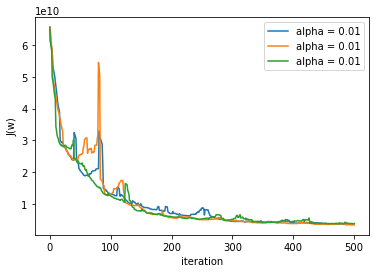

In [85]:
# Test gradient_descent_poly_ridge
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 500

# Try several runs with the same alpha
for alpha in (0.01, 0.01, 0.01):
    _,_,_,_,_,_, Jws, _ = sto_gradient_descent_poly_ridge(alpha, niter, (areas, nbedrooms, prices),0.01)
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

k=0, J(w|x)=22472000000.0, J(w)=65591548106.45744
k=10, J(w|x)=14933655315.998014, J(w)=47364901194.56943
k=20, J(w|x)=30738821210.428646, J(w)=30290085491.66291
k=30, J(w|x)=17010926563.1522, J(w)=24308208270.867386
k=40, J(w|x)=17154528577.924269, J(w)=23811749640.425304
k=50, J(w|x)=8807446477.313427, J(w)=20141172517.349026
k=60, J(w|x)=10554796296.832588, J(w)=17987020273.903015
k=70, J(w|x)=6303687030.898897, J(w)=16814116734.064194
k=80, J(w|x)=5276027582.609629, J(w)=16544443372.811424
k=90, J(w|x)=13229286325.590427, J(w)=14735574719.359562
k=100, J(w|x)=3125805432.6621547, J(w)=13522770993.243572
k=110, J(w|x)=40874716997.68935, J(w)=13432649780.799843
k=120, J(w|x)=40431902086.16475, J(w)=13213375007.044544
k=130, J(w|x)=3289213670.365422, J(w)=15546738728.411865
k=140, J(w|x)=14242010988.428576, J(w)=14327009559.962976
k=150, J(w|x)=3808876311.6638765, J(w)=11669834302.479395
k=160, J(w|x)=10760643332.039505, J(w)=11433782157.099335
k=170, J(w|x)=4348340253.7737, J(w)=11795

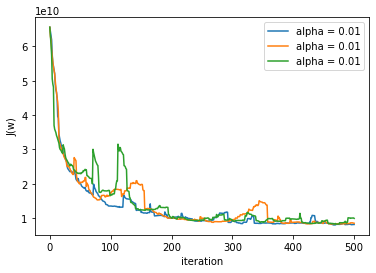

In [86]:
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 500

# Try several runs with the same alpha
for alpha in (0.01, 0.01, 0.01):
    _,_,_,_,_,_, Jws, _ = sto_gradient_descent_poly_ridge(alpha, niter, (areas, nbedrooms, prices),0.1)
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()

k=0, J(w|x)=164680605000.0, J(w)=65591548106.45744
k=10, J(w|x)=26860620810.445007, J(w)=37811703024.69495
k=20, J(w|x)=43460277967.76751, J(w)=43586230613.0856
k=30, J(w|x)=77650593232.74336, J(w)=33806125843.17199
k=40, J(w|x)=51823387201.05474, J(w)=30974223422.77561
k=50, J(w|x)=48131611053.09859, J(w)=32564703304.022293
k=60, J(w|x)=78319805372.77045, J(w)=30763674481.717243
k=70, J(w|x)=21309353913.03927, J(w)=31019071293.001053
k=80, J(w|x)=18610241662.930374, J(w)=32053993394.49788
k=90, J(w|x)=39794295633.83601, J(w)=32430293827.370724
k=100, J(w|x)=39036072130.10289, J(w)=28663752789.13104
k=110, J(w|x)=13529147878.612862, J(w)=31588888894.461777
k=120, J(w|x)=22512681178.87275, J(w)=33846121804.61831
k=130, J(w|x)=38076633658.44809, J(w)=29556016807.387085
k=140, J(w|x)=61007978572.46539, J(w)=28442517388.586044
k=150, J(w|x)=17471113832.4372, J(w)=27607154534.489918
k=160, J(w|x)=39336281133.410545, J(w)=27475826769.816303
k=170, J(w|x)=60402451098.94389, J(w)=28163038577.9

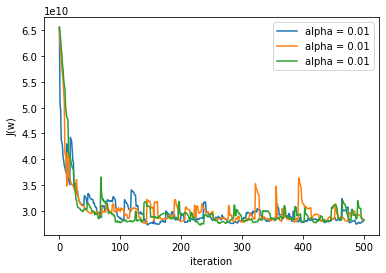

In [87]:
areas, nbedrooms, prices = read_data('normalized.txt')
import matplotlib.pyplot as plt
niter = 500

# Try several runs with the same alpha
for alpha in (0.01, 0.01, 0.01):
    _,_,_,_,_,_, Jws, _ = sto_gradient_descent_poly_ridge(alpha, niter, (areas, nbedrooms, prices),1.0)
    plt.plot(range(niter+1), Jws, label='alpha = {}'.format(alpha))
plt.xlabel('iteration')
plt.ylabel('J(w)')
plt.legend()
plt.show()